In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("Match.csv")
deliveries = pd.read_csv("deliveries.csv")

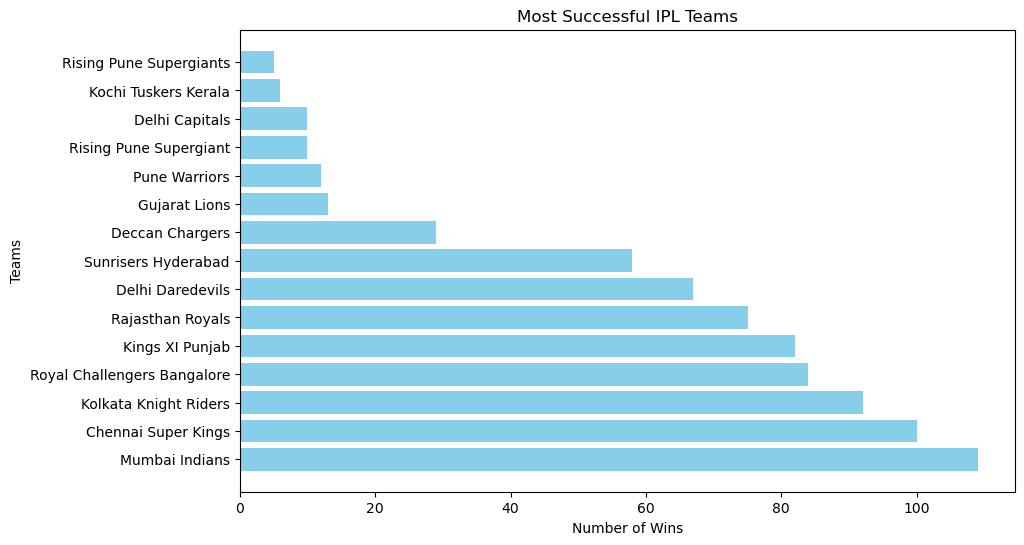

In [3]:
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']
plt.figure(figsize=(10,6))
plt.barh(team_wins['Team'], team_wins['Wins'], color='skyblue')
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.title("Most Successful IPL Teams")
plt.savefig("MostSuccessful")
plt.show()

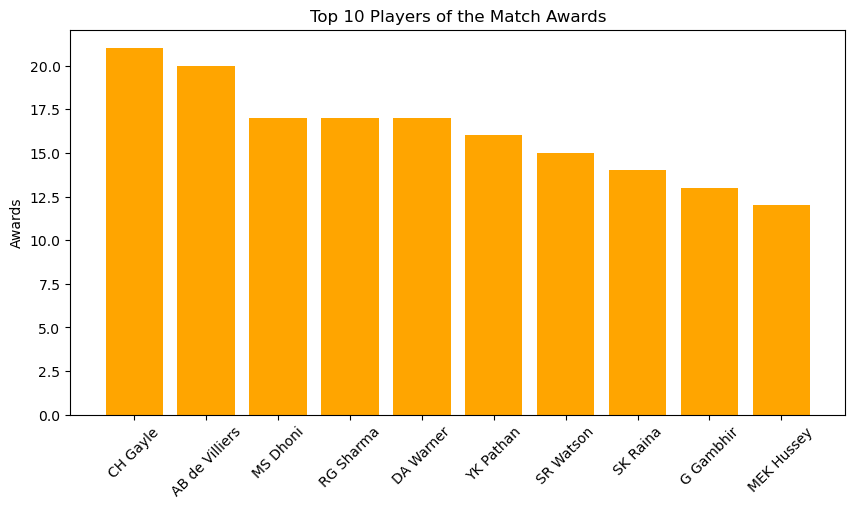

In [4]:
top_players = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(top_players.index, top_players.values, color='orange')
plt.xticks(rotation=45)
plt.ylabel("Awards")
plt.title("Top 10 Players of the Match Awards")
plt.show()

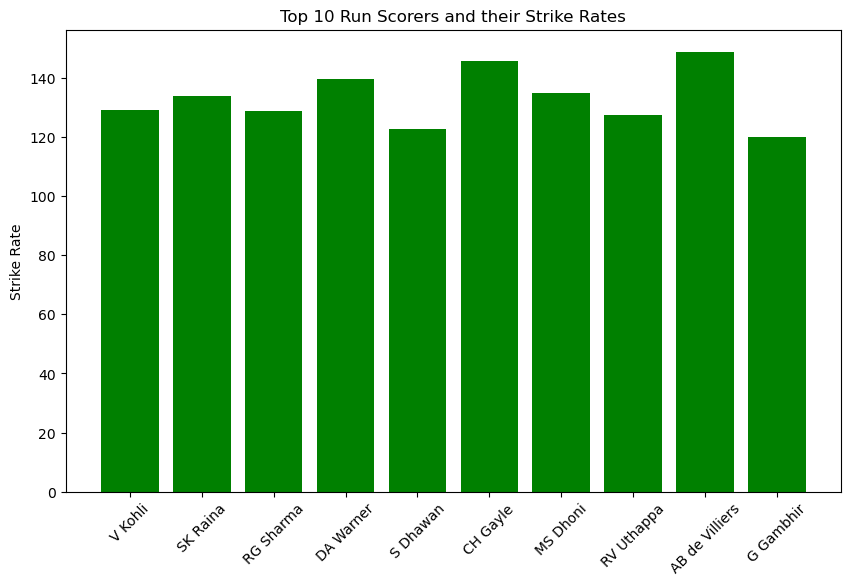

In [5]:
batsman_stats = deliveries.groupby('batsman').agg({
    'batsman_runs':'sum',
    'ball':'count'
}).reset_index()
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100
top_batsmen = batsman_stats.sort_values(by='batsman_runs', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_batsmen['batsman'], top_batsmen['strike_rate'], color='green')
plt.xticks(rotation=45)
plt.ylabel("Strike Rate")
plt.title("Top 10 Run Scorers and their Strike Rates")
plt.show()

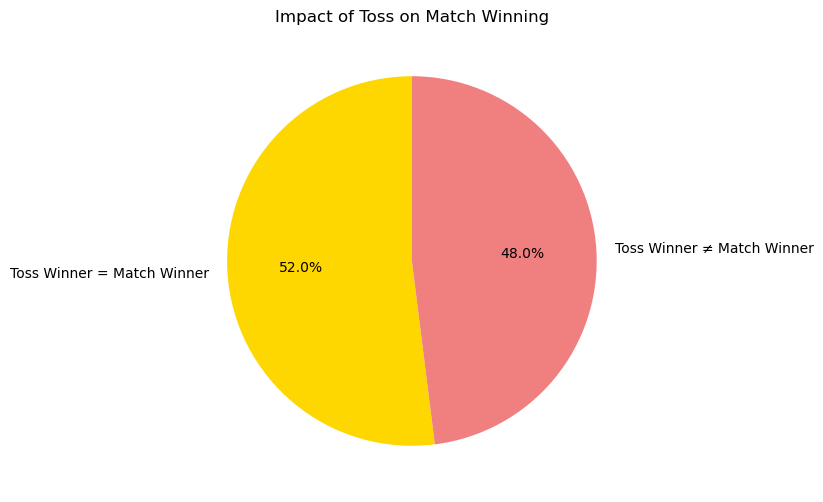

Percentage of matches won by toss winner: 51.98 %


In [6]:
import pandas as pd
import matplotlib.pyplot as plt








toss_wins = matches[matches['toss_winner']==matches['winner']]
toss_win_percentage = (len(toss_wins) / len(matches)) * 100

labels = ['Toss Winner = Match Winner', 'Toss Winner ≠ Match Winner']
sizes = [len(toss_wins), len(matches)-len(toss_wins)]
colors = ['gold', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Impact of Toss on Match Winning")
plt.show()

print("Percentage of matches won by toss winner:", round(toss_win_percentage,2), "%")


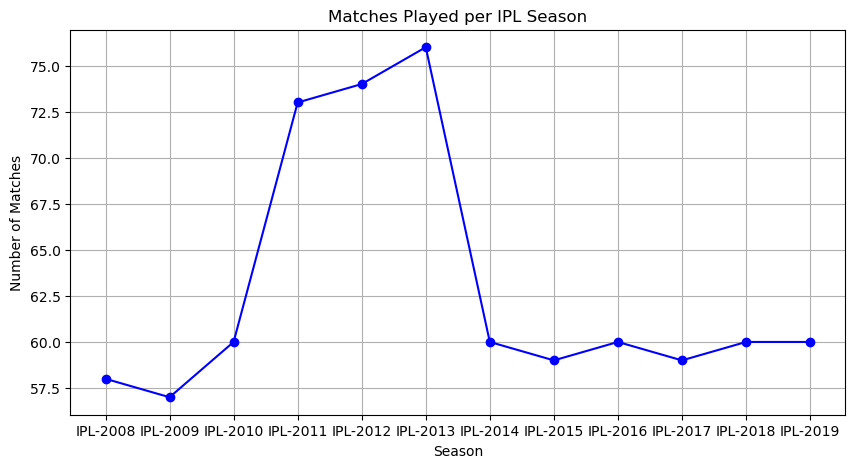

In [8]:
matches_per_season = matches['Season'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(matches_per_season.index, matches_per_season.values, marker='o', color='blue')
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Matches Played per IPL Season")
plt.grid(True)
plt.show()

Top 5 Teams by Win Percentage:
Delhi Capitals            62.500000
Rising Pune Supergiant    62.500000
Chennai Super Kings       60.975610
Mumbai Indians            58.288770
Sunrisers Hyderabad       53.703704
Name: count, dtype: float64


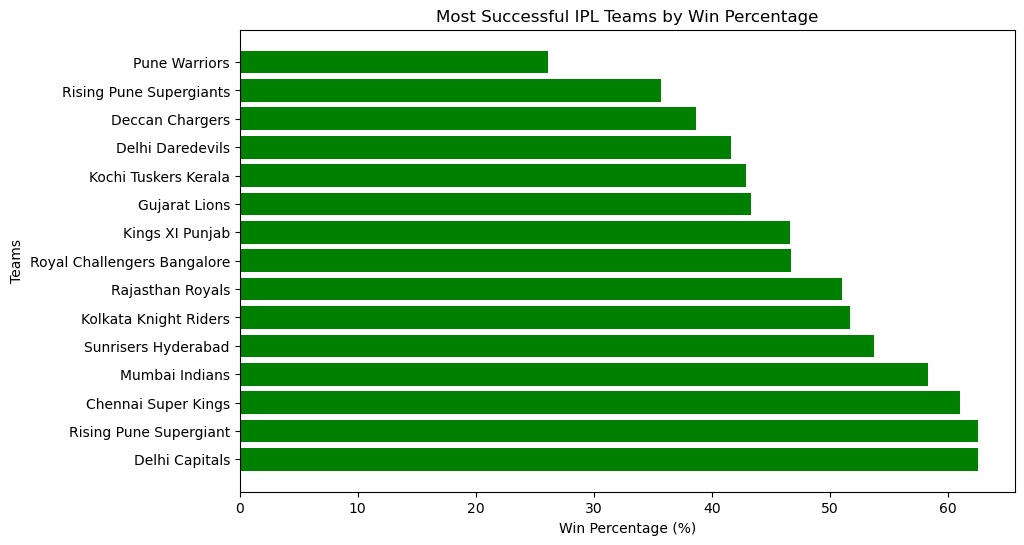


🏆 The team with the highest win percentage is **Delhi Capitals** with 62.5% wins.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
matches = pd.read_csv("Match.csv")

# Count matches played by each team
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()

# Count matches won by each team
matches_won = matches['winner'].value_counts()
win_percentage = (matches_won / matches_played) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)
print("Top 5 Teams by Win Percentage:")
print(win_percentage.head())
plt.figure(figsize=(10,6))
plt.barh(win_percentage.index, win_percentage.values, color="green")
plt.xlabel("Win Percentage (%)")
plt.ylabel("Teams")
plt.title("Most Successful IPL Teams by Win Percentage")
plt.show()
top_team = win_percentage.index[0]
top_percentage = round(win_percentage.values[0],2)
print(f"\n🏆 The team with the highest win percentage is **{top_team}** with {top_percentage}% wins.")


Top 10 Batsmen with Highest Death Overs Strike Rate (min 200 balls faced):
            batsman  batsman_runs  ball  strike_rate
342         RR Pant           484   215   225.116279
24   AB de Villiers          1412   653   216.232772
82         CH Gayle           493   241   204.564315
31       AD Russell           846   423   200.000000
407       SV Samson           414   221   187.330317
99        DA Warner           512   274   186.861314
439         V Kohli          1154   624   184.935897
403       SR Watson           446   243   183.539095
204        KL Rahul           367   204   179.901961
98        DA Miller           769   430   178.837209


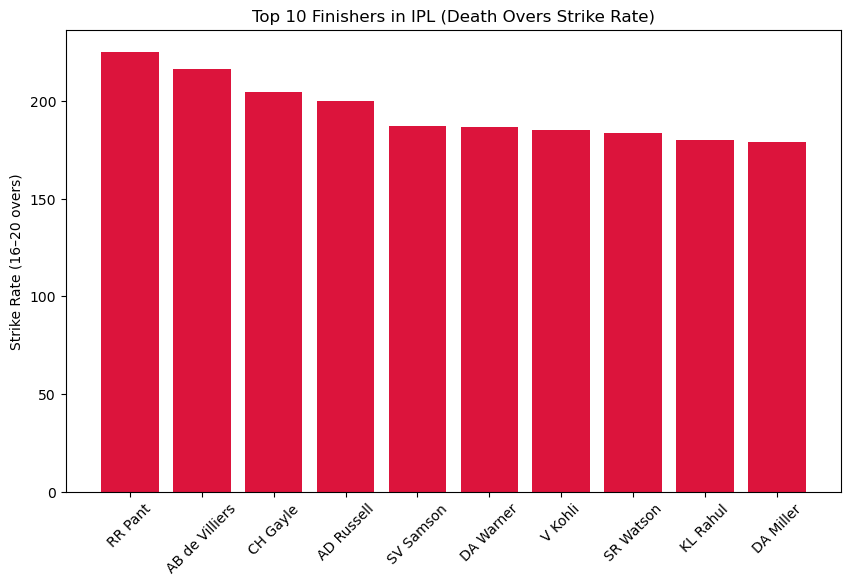

In [13]:
death_overs = deliveries[deliveries['over'] >= 16]

# Runs & balls faced by each batsman in death overs
death_stats = death_overs.groupby('batsman').agg({
    'batsman_runs':'sum',
    'ball':'count'
}).reset_index()
death_stats['strike_rate'] = (death_stats['batsman_runs'] / death_stats['ball']) * 100
death_stats = death_stats[death_stats['ball'] >= 200]
top_finishers = death_stats.sort_values(by='strike_rate', ascending=False).head(10)
print("Top 10 Batsmen with Highest Death Overs Strike Rate (min 200 balls faced):")
print(top_finishers[['batsman','batsman_runs','ball','strike_rate']])

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_finishers['batsman'], top_finishers['strike_rate'], color='crimson')
plt.xticks(rotation=45)
plt.ylabel("Strike Rate (16–20 overs)")
plt.title("Top 10 Finishers in IPL (Death Overs Strike Rate)")
plt.show()

Top 10 Batsmen with Most Sixes in Death Overs (16–20):
          batsman  sixes
0        MS Dhoni    153
1  AB de Villiers    106
2      KA Pollard    106
3       RG Sharma     88
4      AD Russell     76
5         V Kohli     74
6    Yuvraj Singh     68
7       YK Pathan     56
8       DA Miller     52
9       HH Pandya     51


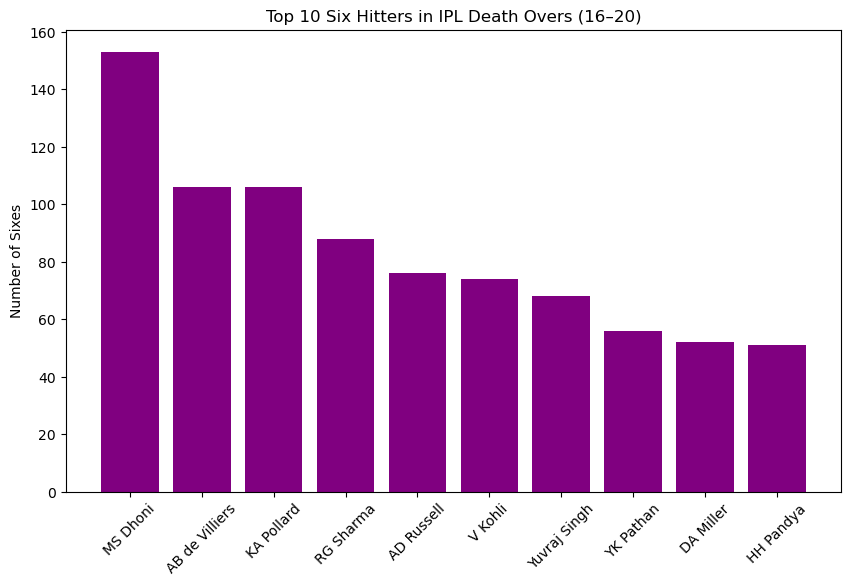

In [14]:
death_sixes = death_overs[death_overs['batsman_runs'] == 6]
sixes_by_batsman = death_sixes['batsman'].value_counts().reset_index()
sixes_by_batsman.columns = ['batsman','sixes']

# Top 10 six hitters
top_six_hitters = sixes_by_batsman.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_six_hitters['batsman'], top_six_hitters['sixes'], color='purple')
plt.xticks(rotation=45)
plt.ylabel("Number of Sixes")
plt.title("Top 10 Six Hitters in IPL Death Overs (16–20)")
plt.show()